In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
import pandas as pd

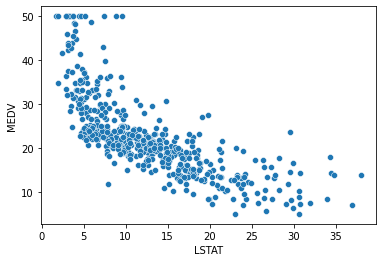

In [4]:
boston = load_boston()
dfX = pd.DataFrame(boston.data, columns = boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

df_boston = pd.concat([dfX, dfy], axis=1)
sns.scatterplot(x ='LSTAT', y='MEDV', data=df_boston)
plt.show()

In [7]:
import statsmodels.api as sm

model1 = sm.OLS.from_formula('MEDV ~ LSTAT', data=df_boston)
result1 = model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           5.08e-88
Time:                        09:37:43   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

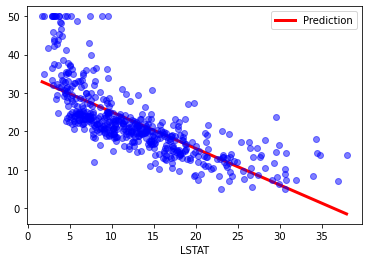

In [8]:
y_hat1 = result1.predict(df_boston)
df1 = pd.concat([y_hat1, df_boston.LSTAT], axis=1).sort_values('LSTAT')
df1.columns = ['Prediction', 'LSTAT']
df1.plot(x='LSTAT', style='r-', lw=3)
plt.plot(df_boston.LSTAT, df_boston.MEDV, 'bo', alpha=0.5)
plt.show()

In [9]:
model2 = sm.OLS.from_formula('MEDV ~ LSTAT + I(LSTAT**2)', data=df_boston)
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Tue, 07 Dec 2021   Prob (F-statistic):          1.56e-112
Time:                        09:41:18   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149      0.000      41.149      44.575
LSTAT            -2.3328      0.124    -18.843      0.000      -2.576      -2.090
I(LSTAT ** 2)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

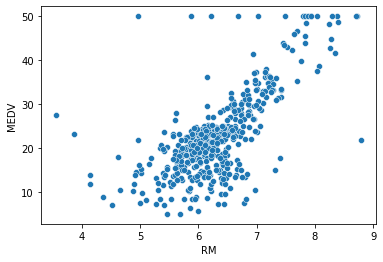

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

In [10]:
sns.scatterplot(x='RM', y='MEDV', data=df_boston)
plt.show()
df_boston['RM']

In [11]:
model3 = sm.OLS.from_formula('MEDV ~ RM', data=df_boston)
result3 = model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           2.49e-74
Time:                        09:42:41   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='CAT_RM', ylabel='MEDV'>

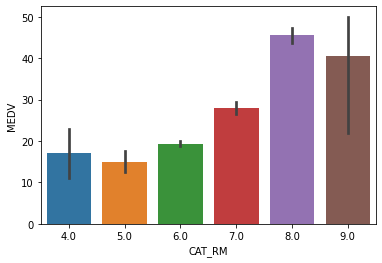

In [12]:
import numpy as np
df_boston['CAT_RM'] = np.round(df_boston.RM)
sns.barplot(x='CAT_RM', y='MEDV', data=df_boston)

In [13]:
model4 = sm.OLS.from_formula('MEDV ~ C(np.round(RM))+0', data=df_boston)
result4 = model4.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     115.8
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           3.57e-81
Time:                        09:51:41   Log-Likelihood:                -1645.6
No. Observations:                 506   AIC:                             3303.
Df Residuals:                     500   BIC:                             3329.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
C(np.round(RM))[4.0]    17.0200      2.814      6.049      0.000      11.492      22.548
C(np.round(RM))[5.0]    14.9459      1.034     14.450      0.000      12.914      16.978
C(np.round(RM))[6.0]    19.3660      0.356     54.369      0.000      18.666      20.066
C(np.round(RM))[7.0]    28.0472      0.563     49.840      0.000      26.942      29.153
C(np.round(RM))[8.0]    45.5625      1.284     35.477      0.000      43.039      48.086
C(np.round(RM))[9.0]    40.6333      3.633     11.186      0.000      33.496      47.770
==============================================================================
Omnibus:                       81.744   Durbin-Watson:                   0.799
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              467.887
Skew:                           0.542   Prob(JB):                    2.51e-102
Kurtosis:                       7.584   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
df = pd.read_csv('C:\data\Data\energy/data.csv')
df.head()

,Unnamed: 0,Demand,Date
0,0,174.896295,2019-01-01
1,1,188.590935,2019-01-02
2,2,188.916891,2019-01-03
3,3,173.814244,2019-01-04
4,4,169.515175,2019-01-05


In [16]:
import datetime as dt

df['Date'] = pd.to_datetime(df['Date'])
df['Ordinal'] = df.Date.map(dt.datetime.toordinal)
df['Timestmap'] = df.Date.map(dt.datetime.timestamp)
df.head()

,Unnamed: 0,Demand,Date,Ordinal,Timestmap
0,0,174.896295,2019-01-01,737060,1.546268e+09
1,1,188.590935,2019-01-02,737061,1.546355e+09
2,2,188.916891,2019-01-03,737062,1.546441e+09
3,3,173.814244,2019-01-04,737063,1.546528e+09
4,4,169.515175,2019-01-05,737064,1.546614e+09


In [17]:
model5 = sm.OLS.from_formula('Demand ~ scale(Ordinal)', data=df)
result5 = model5.fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Demand   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     11.58
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           0.000739
Time:                        10:03:48   Log-Likelihood:                -1709.7
No. Observations:                 365   AIC:                             3423.
Df Residuals:                     363   BIC:                             3431.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        221.2775      1.374    160.997      0.000     218.575     223.980
scale(Ordinal)    -4.6779      1.374     -3.404      0.001      -7.381      -1.975
==============================================================================
Omnibus:                       43.105   Durbin-Watson:                   0.677
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.485
Skew:                           0.614   Prob(JB):                     1.12e-21
Kurtosis:                       5.199   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month
df['DayOfYear'] = df.Date.dt.dayofyear #연중 몇일차
df['DayOfMonth'] = df.Date.dt.daysinmonth
df['DayOfWeek'] = df.Date.dt.dayofweek
df['WeekOfYear'] = df.Date.dt.weekofyear #연중 몇주차
df['Weekday'] = df.Date.dt.weekday #요일코드
df['IsMonthStart'] = df.Date.dt.is_month_start
df['IsMonthEnd'] = df.Date.dt.is_month_end
df.tail()

<ipython-input-19-d6833022cd45>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['WeekOfYear'] = df.Date.dt.weekofyear


,Unnamed: 0,Demand,Date,Ordinal,Timestmap,Year,Month,DayOfYear,DayOfMonth,DayOfWeek,WeekOfYear,Weekday,IsMonthStart,IsMonthEnd
360,360,173.727990,2019-12-27,737420,1.577372e+09,2019,12,361,31,4,52,4,False,False
361,361,188.512817,2019-12-28,737421,1.577459e+09,2019,12,362,31,5,52,5,False,False
362,362,191.273009,2019-12-29,737422,1.577545e+09,2019,12,363,31,6,52,6,False,False
363,363,186.240144,2019-12-30,737423,1.577632e+09,2019,12,364,31,0,1,0,False,False
364,364,186.370181,2019-12-31,737424,1.577718e+09,2019,12,365,31,1,1,1,False,True


In [21]:
formula = '''
Demand ~ scale(Ordinal) + C(Month)+0 + DayOfYear + 
C(DayOfMonth)+0 + C(DayOfWeek)+0 + C(Weekday)+0 + 
C(IsMonthStart)+0 + C(IsMonthEnd)+0
'''

model6 = sm.OLS.from_formula(formula, data=df)
result6 = model6.fit()
result6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Demand   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     19.98
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           4.74e-46
Time:                        10:12:13   Log-Likelihood:                -1574.8
No. Observations:                 365   AIC:                             3192.
Df Residuals:                     344   BIC:                             3273.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
C(Month)[1]               -35.4453     20.040     -1.769      0.078     -74.862       3.972
C(Month)[2]                10.1956     10.114      1.008      0.314      -9.698      30.089
C(Month)[3]               -36.6822     12.925     -2.838      0.005     -62.104     -11.260
C(Month)[4]               -30.0630     11.405     -2.636      0.009     -52.495      -7.631
C(Month)[5]               -12.0416      5.926     -2.032      0.043     -23.698      -0.385
C(Month)[6]                10.4912      4.599      2.281      0.023       1.446      19.537
C(Month)[7]                29.3642      3.958      7.419      0.000      21.579      37.149
C(Month)[8]                31.1239      6.993      4.451      0.000      17.370      44.878
C(Month)[9]                21.8932      8.344      2.624      0.009       5.482      38.305
C(Month)[10]               23.6038     14.111      1.673      0.095      -4.151      51.358
C(Month)[11]               32.5521     15.583      2.089      0.037       1.903      63.202
C(Month)[12]               36.8070     21.489      1.713      0.088      -5.460      79.074
C(DayOfMonth)[T.30]        34.8735      8.688      4.014      0.000      17.785      51.962
C(DayOfMonth)[T.31]        36.7298      6.502      5.649      0.000      23.941      49.519
C(DayOfWeek)[T.1]          -1.9011      1.820     -1.044      0.297      -5.481       1.679
C(DayOfWeek)[T.2]          -0.6198      1.830     -0.339      0.735      -4.219       2.979
C(DayOfWeek)[T.3]          -2.5934      1.833     -1.414      0.158      -6.200       1.013
C(DayOfWeek)[T.4]         -16.3748      1.831     -8.945      0.000     -19.975     -12.774
C(DayOfWeek)[T.5]         -19.9389      1.831    -10.888      0.000     -23.541     -16.337
C(DayOfWeek)[T.6]          -3.4766      1.829     -1.900      0.058      -7.075       0.121
C(Weekday)[T.1]            -1.9011      1.820     -1.044      0.297      -5.481       1.679
C(Weekday)[T.2]            -0.6198      1.830     -0.339      0.735      -4.219       2.979
C(Weekday)[T.3]            -2.5934      1.833     -1.414      0.158      -6.200       1.013
C(Weekday)[T.4]           -16.3748      1.831     -8.945      0.000     -19.975     -12.774
C(Weekday)[T.5]           -19.9389      1.831    -10.888      0.000     -23.541     -16.337
C(Weekday)[T.6]            -3.4766      1.829     -1.900      0.058      -7.075       0.121
C(IsMonthStart)[T.True]     1.2012      5.781      0.208      0.836     -10.169      12.571
C(IsMonthEnd)[T.True]       4.7608      5.781      0.824      0.411      -6.609      16.131
scale(Ordinal)           -142.0585      8.995    -15.794      0.000    -159.750    -124.367
DayOfYear                   1.0591      0.041     25.806      0.000       0.978       1.140
===============================================

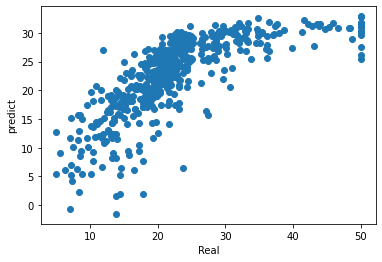

In [22]:
plt.scatter(boston.target, y_hat1)
plt.xlabel('Real')
plt.ylabel('predict')
plt.show()

In [24]:
model11 = sm.OLS.from_formula('np.sqrt(MEDV) ~ LSTAT', data=df_boston)
result11 = model11.fit()
result11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.sqrt(MEDV)   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     789.7
Date:                Tue, 07 Dec 2021   Prob (F-statistic):          3.09e-105
Time:                        10:15:57   Log-Likelihood:                -445.65
No. Observations:                 506   AIC:                             895.3
Df Residuals:                     504   BIC:                             903.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9499      0.053    112.374      0.000       5.846       6.054
LSTAT         -0.1024      0.004    -28.101      0.000      -0.110      -0.095
==============================================================================
Omnibus:                       74.833   Durbin-Watson:                   0.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.528
Skew:                           0.976   Prob(JB):                     6.05e-25
Kurtosis:                       4.216   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

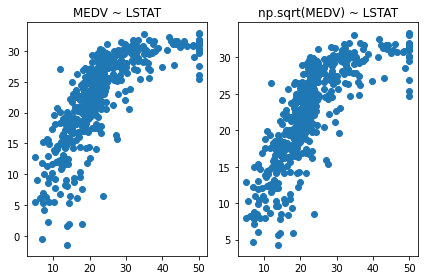

In [25]:
plt.subplot(121)
plt.scatter(boston.target, y_hat1)
plt.title('MEDV ~ LSTAT')
plt.subplot(122)
plt.scatter(boston.target, (result11.predict(df_boston))**2)
plt.title('np.sqrt(MEDV) ~ LSTAT')
plt.tight_layout()
plt.show()

In [26]:
model12 = sm.OLS.from_formula('np.log(MEDV) ~ LSTAT', data=df_boston)
result12 = model12.fit()
result12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(MEDV)   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     928.1
Date:                Tue, 07 Dec 2021   Prob (F-statistic):          2.23e-116
Time:                        10:18:20   Log-Likelihood:               -0.57634
No. Observations:                 506   AIC:                             5.153
Df Residuals:                     504   BIC:                             13.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6176      0.022    164.654      0.000       3.574       3.661
LSTAT         -0.0461      0.002    -30.465      0.000      -0.049      -0.043
==============================================================================
Omnibus:                       27.562   Durbin-Watson:                   0.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.719
Skew:                           0.351   Prob(JB):                     9.69e-12
Kurtosis:                       4.383   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""